In [ ]:
!pip install transformers
!pip install sentencepiece
#!pip install tensorflow==2.4.0 

In [ ]:
# import module
import pandas as pd
import numpy as np
import re
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import nltk
nltk.download("stopwords")
AUTO = tf.data.experimental.AUTOTUNE
MAX_LENGTHS = 23

NUM_CATEGORICAL = 3
dfResult = pd.DataFrame(columns=[ "rataAccTrain", "rataAccVal",
                    "rataLossTrain", "rataLossVal",
                    "precisionTrain","precisionVal",
                    "recallTrain","recallVal","ModelName"])
HISTORY_TRANSFORMERS = []


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!gdown --id 12dOTpFSEjcn0RfOMo74IqieHj62-qYlV 
!gdown --id 1jocD8VuW51FFhIBWP1uWUNKJFM6UKJCS
!gdown --id 1oRrsRgJOPDYhdmPdjzwgHR_9DF57mIVk
!gdown --id 1xTGyej4s4Aev5-Vsm5z16b26mVGQm5rm

Downloading...
From: https://drive.google.com/uc?id=12dOTpFSEjcn0RfOMo74IqieHj62-qYlV
To: /content/ResultLstmMerged.xlsx
100% 5.29k/5.29k [00:00<00:00, 9.42MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jocD8VuW51FFhIBWP1uWUNKJFM6UKJCS
To: /content/ResultLstm.xlsx
100% 5.29k/5.29k [00:00<00:00, 15.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oRrsRgJOPDYhdmPdjzwgHR_9DF57mIVk
To: /content/ResultTransformer.xlsx
100% 5.65k/5.65k [00:00<00:00, 4.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xTGyej4s4Aev5-Vsm5z16b26mVGQm5rm
To: /content/ResultTransformerMerged.xlsx
100% 5.65k/5.65k [00:00<00:00, 4.83MB/s]


In [ ]:
dfLstm = pd.concat([pd.read_excel("ResultLstm.xlsx")])
dfTransformer = pd.concat([pd.read_excel("ResultTransformer.xlsx")])


In [ ]:
import plotly.graph_objects as go

In [ ]:
df = pd.concat([dfLstm,dfTransformer])
df = df[df["ModelName"].isin(["LSTM","LSTM Bidirectional","IndoBert","Roberta","XLMROBERTA","GPT2"])]
df["f1ScoreTrain"] = 2*(df["precisionTrain"] * df["recallTrain"]) / (df["recallTrain"] + df["precisionTrain"])
df["f1ScoreVal"]  = 2*(df["precisionVal"] * df["recallVal"]) / (df["recallVal"] + df["precisionVal"])

In [ ]:
df

,rataAccTrain,rataAccVal,rataLossTrain,rataLossVal,precisionTrain,precisionVal,recallTrain,recallVal,ModelName,f1ScoreTrain,f1ScoreVal
0,0.762877,0.743662,0.537714,0.617976,0.850324,0.819258,0.678008,0.670305,LSTM,0.754452,0.737334
1,0.761267,0.742997,0.535536,0.611249,0.840105,0.804475,0.685676,0.673279,LSTM Bidirectional,0.755075,0.733053
0,0.715306,0.731768,0.661353,0.618743,0.805034,0.807167,0.609998,0.643975,IndoBert,0.694075,0.716395
1,0.686773,0.690376,0.714811,0.710803,0.792033,0.802806,0.565163,0.559155,Roberta,0.659636,0.659186
3,0.688214,0.708255,0.749978,0.686671,0.789768,0.803694,0.577245,0.585094,GPT2,0.666987,0.677190
4,0.651127,0.686737,0.758883,0.700239,0.806019,0.864705,0.491955,0.498826,XLMROBERTA,0.610991,0.632677


In [ ]:
colors = ["#0b618e","#0b7b8e","#0b478e",
          "#0b618e","#0b2d8e","#8f0e0b"]
fig = go.Figure()
fig.add_traces(go.Bar( x = df["ModelName"],y = df["rataAccTrain"],
                      text=df["rataAccTrain"],textposition='auto' ,marker={"color":colors}))
fig.update_layout(
    title={
        'text': "Akurasi Training Models",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1200,
    height=700,

)

#fig.to_image("Akurasi Training Models.png")

In [ ]:
df

,rataAccTrain,rataAccVal,rataLossTrain,rataLossVal,precisionTrain,precisionVal,recallTrain,recallVal,ModelName,f1ScoreTrain,f1ScoreVal
0,0.762877,0.743662,0.537714,0.617976,0.850324,0.819258,0.678008,0.670305,LSTM,0.754452,0.737334
1,0.761267,0.742997,0.535536,0.611249,0.840105,0.804475,0.685676,0.673279,LSTM Bidirectional,0.755075,0.733053
0,0.715306,0.731768,0.661353,0.618743,0.805034,0.807167,0.609998,0.643975,IndoBert,0.694075,0.716395
1,0.686773,0.690376,0.714811,0.710803,0.792033,0.802806,0.565163,0.559155,Roberta,0.659636,0.659186
3,0.688214,0.708255,0.749978,0.686671,0.789768,0.803694,0.577245,0.585094,GPT2,0.666987,0.677190
4,0.651127,0.686737,0.758883,0.700239,0.806019,0.864705,0.491955,0.498826,XLMROBERTA,0.610991,0.632677


In [ ]:
colors = ["#0b618e","#0b7b8e","#0b478e",
          "#0b618e","#0b2d8e","#8f0e0b"]
fig = go.Figure()
fig.add_traces(go.Bar( x = df["ModelName"],y = df["rataAccVal"],
                      text=df["rataAccVal"],textposition='auto' ,marker={"color":colors}))
fig.update_layout(
    title={
        'text': "Akurasi Validasi Models",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
            width=1200,
    height=700,
)
fig.show()

In [ ]:
colors = ["#0b618e","#0b7b8e","#0b478e",
          "#0b618e","#0b2d8e","#8f0e0b"]
fig = go.Figure()
fig.add_traces(go.Bar( x = df["ModelName"],y = df["f1ScoreTrain"],
                      text=df["f1ScoreTrain"],textposition='auto' ,marker={"color":colors}))
fig.update_layout(
    title={
        'text': "f1ScoreTrain Models",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}

)
fig.show()

In [ ]:
colors = ["#0b618e","#0b7b8e","#0b478e",
          "#0b618e","#0b2d8e","#8f0e0b"]
fig = go.Figure()
fig.add_traces(go.Bar( x = df["ModelName"],y = df["f1ScoreVal"],
                      text=df["f1ScoreVal"],textposition='auto' ,marker={"color":colors}))
fig.update_layout(
    title={
        'text': "f1ScoreVal Models",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}

)
fig.show()

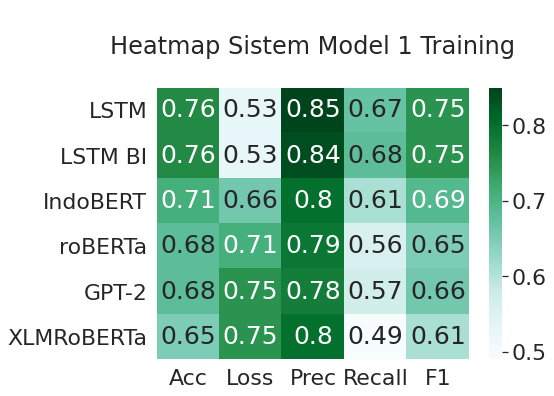

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2.0)
plt.figure(figsize=(7,5))
data = np.array([[0.76, 0.53, 0.85, 0.67, 0.75],
                 [0.76, 0.53, 0.84, 0.68, 0.75],
                 [0.71, 0.66, 0.8, 0.61, 0.69],
                 [0.68, 0.71, 0.79, 0.56, 0.65],
                 [0.68, 0.75, 0.78, 0.57, 0.66],
                 [0.65, 0.75, 0.8, 0.49, 0.61]])
plt.title("\nHeatmap Sistem Model 1 Training\n")
df = pd.DataFrame(data, index = ['LSTM', 'LSTM BI', 'IndoBERT', 'roBERTa', 'GPT-2', 'XLMRoBERTa'], 
                  columns= ['Acc','Loss','Prec','Recall','F1'])
sns.heatmap(df,annot=True,cmap="BuGn",annot_kws={'size': 25})

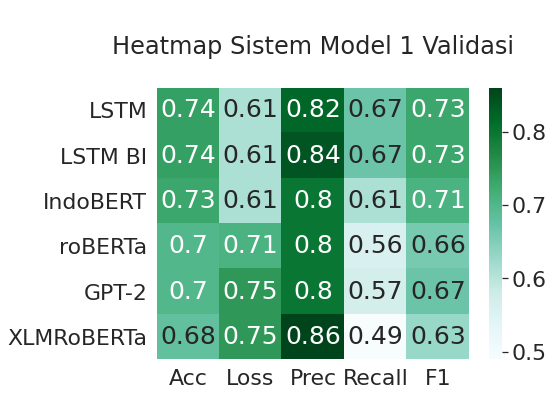

In [ ]:
sns.set(font_scale=2.0)
plt.figure(figsize=(7,5))
data = np.array([[0.74, 0.61, 0.82, 0.67, 0.73],
                 [0.74, 0.61, 0.84, 0.67, 0.73],
                 [0.73, 0.61, 0.80, 0.61, 0.71],
                 [0.70, 0.71, 0.80, 0.56, 0.66],
                 [0.70, 0.75, 0.80, 0.57, 0.67],
                 [0.68, 0.75, 0.86, 0.49, 0.63]])
plt.title("\nHeatmap Sistem Model 1 Validasi\n")
df = pd.DataFrame(data, index = ['LSTM', 'LSTM BI', 'IndoBERT', 'roBERTa', 'GPT-2', 'XLMRoBERTa'], 
                  columns= ['Acc','Loss','Prec','Recall','F1'])
sns.heatmap(df,annot=True,cmap="BuGn",annot_kws={'size': 25})

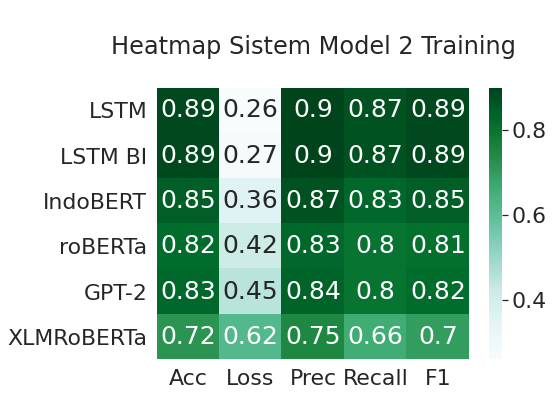

In [ ]:
sns.set(font_scale=2.0)
plt.figure(figsize=(7,5))
data = np.array([[0.89, 0.26, 0.90, 0.87, 0.89],
                 [0.89, 0.27, 0.90, 0.87, 0.89],
                 [0.85, 0.36, 0.87, 0.83, 0.85],
                 [0.82, 0.42, 0.83, 0.80, 0.81],
                 [0.83, 0.45, 0.84, 0.80, 0.82],
                 [0.72, 0.62, 0.75, 0.66, 0.70]])
plt.title("\nHeatmap Sistem Model 2 Training\n")
df = pd.DataFrame(data, index = ['LSTM', 'LSTM BI', 'IndoBERT', 'roBERTa', 'GPT-2', 'XLMRoBERTa'], 
                  columns= ['Acc','Loss','Prec','Recall','F1'])
sns.heatmap(df,annot=True,cmap="BuGn",annot_kws={'size': 25})

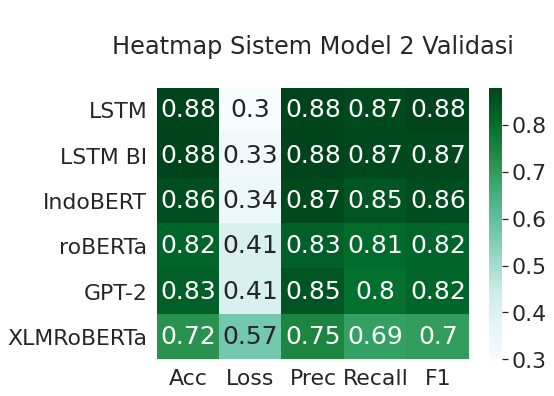

In [ ]:
sns.set(font_scale=2.0)
plt.figure(figsize=(7,5))
data = np.array([[0.88, 0.30, 0.88, 0.87, 0.88],
                 [0.88, 0.33, 0.88, 0.87, 0.87],
                 [0.86, 0.34, 0.87, 0.85, 0.86],
                 [0.82, 0.41, 0.83, 0.81, 0.82],
                 [0.83, 0.41, 0.85, 0.80, 0.82],
                 [0.72, 0.57, 0.75, 0.69, 0.70]])
plt.title("\nHeatmap Sistem Model 2 Validasi\n")
df = pd.DataFrame(data, index = ['LSTM', 'LSTM BI', 'IndoBERT', 'roBERTa', 'GPT-2', 'XLMRoBERTa'], 
                  columns= ['Acc','Loss','Prec','Recall','F1'])
sns.heatmap(df,annot=True,cmap="BuGn",annot_kws={'size': 25})